# Exercises and Homework for week 7

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

**Your group number here please:**  Group 02  
Ajay, Areti & Vlera

## 1. Lecture Review (0 points)

N/A

## 2. Magnitudes of Optical Imaging data (10 points)

In astronomy, optical imaging data are observed in well-defined parts of the electromagnetic spectrum. Typical broad-band filters are $B$ (blue; around $450$ nm), $R$ (red; around 650 nm) and $I$ (infrared; around 800 nm). One of the more difficult tasks during processing of optical data is to calibrate the brightness (or the magnitudes) of astronomical data. It is usually easire to calibrate some bands than others.

The figure below shows in the left panel two *colours* of stellar sources (a colour is just the difference of the magnitudes in two bands, e.g. $B-R$). The blue points are the data and the red points model predictions for the colours. We note that there is a difference between model and data that primarily originates from calibration errors in the data.

We assume that the $R$-band has a good calibration and the errors originate from problems in the $B$ and $I$ bands. If we apply *optimal shifts* (defined below) to the $B$ and $I$ magnitudes, we obtain the right panel of the figure below.

Your task is to write a program to estimate these shifts for the $B$ and $I$ band magnitudes.

![SLR](figs/SLR.png)

### The algorithm
We separately want to estimate necessary shifts for the $B$ and $I$ band magnitudes to match the model and the data magnitudes. The idea to do so is the following:

- We have arrays $d$ and $m$ with the $B-R$-colours from the data and the model respectively.
- We calculate the distance from *each point* in the $d$-array to *each point* in the $m$-array and we analyse all the obtained distances in a histogram. For the program data, I obtain the following histogram for the $B-R$ case:

<img src="figs/bmr_histo.png" style="width: 400px;" style="height: 200px;">

- The *optimal* shift is given by the highest histogram bin. 

### The program plan
1. **Before you start any coding:**
  Please be sure to understand the scientific problem and the algorithm to solve it.
  If you are unsure, please contact Nina or myself **well in advance** of the homework deadline! Please answer below the following questions: *Why do we use a histogram analysis for the given problem? Why can't we just calculate all the distance and take the distance appearing most often as an estimate for our shift? What physical meaning does the bin-width of the histogram have for our problem? How large would you choose the bin-width?*
2. In the files [data/stars_BRI_data.asc](data/stars_BRI_data.asc) and [data/stars_BRI_model.asc](data/stars_BRI_model.asc) you find the magnitudes of stars for data and model.
3. Read in the data into your program and reproduce as a first step the $B-R$ vs. $R-I$ plot for the uncorrected data.
4. Create an array `bmr_distances` containg the distances from *all* $B-R$ model points to *all* $B-R$ data points.

  **Hint:** This is a *one-line* broadcasting task! It is very easy if you understand the *Route 66* problem of the Review questions sheet!
5. Analyse the `bmr_distances`.array with the `np.histogram` function to obtain the optical shift to bring data and model into accordance.

  **Hints:**
  - Read carefully the documentation for the `np.histogram`-function. What does it return?
  - Use a histogram bin-width of 0.05. This is approximately the accuracy that we can reach with the proposed magnitude-correction method.
  - To determine the highest bin of the histogram you can use the `np.argmax` function. Read its documentation!
  - For checking purposes, you can plot your histogram with the `plt.hist`-function. It has exactly the same syntax and functionality as `np.histogram`!
6. Repeast steps (4) and (5) for the $R-I$ colour
7. Apply the obtained corrections to your data and reproduce the right panel of the plot above.
8. Discuss your results!

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt

**Remarks:**  
The distances are real values and there is no reason for any two of the distances to be exactly the same. This eliminates the possibility of calculating all the distances and taking the distance that appears the most. We can try to find the mean of all differences, but this makes sense only when the differences are highly concentrated, i.e., the variance is not very high. We don't expect this to be the case here. Therefore, we go with histogram analysis, where we try to find the range in which most of the distances fall. We should choose a bin width that corresponds to the resolution of the measurements. For example, it is not meaningful to choose a bin width of $0.1$ units when the resolution is $1$ unit. In that case, the bin width must be at least $1$ unit. The given bin width of $0.05$ is meaningful here.

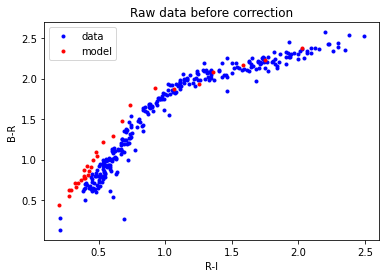

In [2]:
#load data; make sure path is OK
data1 = np.loadtxt('stars_BRI_data.asc', skiprows=3) #load data values; skip first three rows as they contain comments
data2 = np.loadtxt('stars_BRI_model.asc', skiprows=3) #load model values, skip first three rows as they contain comments

d = data1[:, 0] - data1[:, 1] #B-R values for data
m = data2[:, 0] - data2[:, 1] #B-R values for model

dri = data1[:, 1] - data1[:, 2] #R-I values for data
mri = data2[:, 1] - data2[:, 2] #R-I values for model

#plotting
plt.plot(dri, d, '.', color = 'b', label = 'data') #plot data B-R against data R-I
plt.plot(mri, m, '.', color = 'r', label = 'model') #plot model B-R against model R-I
plt.legend(loc = "upper left") #set legend pos
plt.title("Raw data before correction") #set title
plt.xlabel("R-I") #set x axis title
plt.ylabel("B-R") #set y axis title
plt.show() #print plot

Optimal shift for B-R = 0.0278


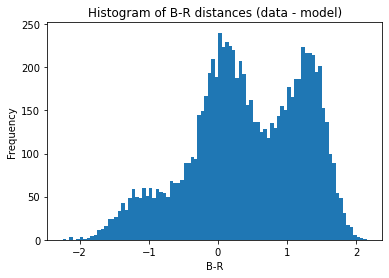

In [3]:
#B-R: data - model distances
bmr_distances = d - m[:, np.newaxis] #subtract every element of m from every element of d
#ravel() is used to convert to 1D array; it is faster than flatten()
binno = np.arange(min(bmr_distances.ravel()), max(bmr_distances.ravel()) + 0.05, 0.05) #set the bin range for the histogram


occ, width = np.histogram(bmr_distances.ravel(), bins = binno) #get bin frequency and bins
#obtain the optimal shift for B-R
optbr = width[np.argmax(occ)] + 0.05/2 #midpoint of the bin
print('Optimal shift for B-R =', round(optbr, 4))

#plotting
plt.hist(bmr_distances.ravel(), bins = binno) #histogram
plt.title('Histogram of B-R distances (data - model)') #set title
plt.xlabel('B-R') #set x axis title
plt.ylabel('Frequency') #set y axis title
plt.show() #print the plot

Optimal shift for R-I = 0.2104


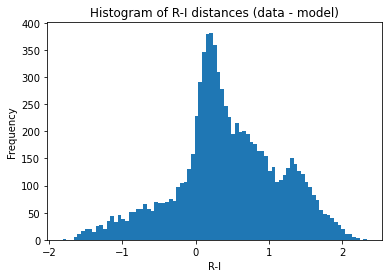

In [4]:
#R-I: data - model distances
bmri_distances = dri - mri[:, np.newaxis] #subtract every element of m from every element of d
binno = np.arange(min(bmri_distances.ravel()), max(bmri_distances.ravel()) + 0.05, 0.05) #set the bin range for the histogram

occ, width = np.histogram(bmri_distances.ravel(), bins = binno) #get bin frequency and bins
#obtain the optimal shift for R-I
optri = width[np.argmax(occ)] + 0.05/2 #midpoint of the bin
print('Optimal shift for R-I =', round(optri, 4))

#plotting
plt.hist(bmri_distances.ravel(), bins = binno) #histogram
plt.title('Histogram of R-I distances (data - model)') #set title
plt.xlabel('R-I') #set x axis title
plt.ylabel('Frequency') #set y axis title
plt.show() #print the plot

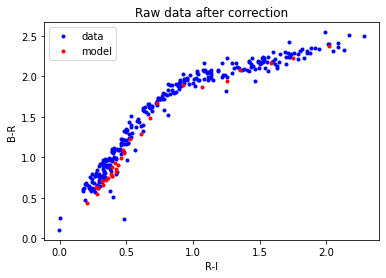

In [5]:
#corrected plot plotting
plt.plot(dri - optri, d - optbr, '.', color = 'blue', label = 'data') #correct R-I and B-R values with optimal shifts
plt.plot(mri, m, '.', color = 'r', label= 'model') #plot model B-R against model R-I
plt.legend(loc = 'upper left') #set legend pos
plt.title('Raw data after correction') #set plot title
plt.xlabel('R-I') #set x axis title
plt.ylabel('B-R') #set y axis title
plt.show() #print the polot

**Remarks:**  
We can see that the histogram we obtain for B-R case is different than what we have in the problem statement. We do not know the exact reason for this difference. But from looking at the plot in the problem statement, we can see that there are only 21 points corresponding to model, whereas we have 30 points in the file containing model values! We think this might be the reason for the difference in the histogram as the additional points are clustered more around the bottom region and the data values on the top have roughly a difference of 1 with all these additional points. We cannot say more about this discrepancy without actually looking at the data used for the image in the problem statement. We believe that our code is doing what it is supposed to do.

## 3. Monte-Carlo Error Propagation

You have likely encountered the concept of propagation of uncertainty before in some lab-courses (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.011~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in a `python`-program (you can just derive the equation by hand and implement it in a single line in your code).

Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1000000 times, using the means and standard deviations given above
  **Hint:** You can get random numbers which are distributed according to the normal (Gaussian) distribution with the `normal` command within the `numpy.random` module.

* compute the gravitational force for each set of values

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1000000 different values for the forces.

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

For your reference, here is the plot that I obtain for this part of the exercise:

<img src="figs/monte_carlo_force.png" style="width: 400px;" style="height: 400px;">

The blue bars are the normalized histogram of my Monte-Carlo simulated forces. The red curve gives the Gaussian prediction for these forces from standard error propagation.  

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm 8\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm 6\times10^4\rm{kg}$$
$$r=3.2\pm 0.6~\rm{m}$$

and as above, produce a plot.

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

In [6]:
#data
#actual values
M1 = 40e4
M2 = 30e4
r = 3.2

#delta for first data
deltaM1_1 = 0.05e4
deltaM2_1= 0.1e4
deltar_1 = 0.011

#delta for second data; no change in actual values
deltaM1_2 = 8e4
deltaM2_2 = 6e4
deltar_2 = 0.6

G = 6.67384e-11 #gravitational constant

mcsamplesize = int(1e6) #set sample size

In [7]:
F_calc = G * M1 * M2 / r**2 #calculate force due to gravity

#calculate error in the force for the two data
#use error propagation rules
deltaF_calc_1 = F_calc * np.sqrt((deltaM1_1/M1)**2 + (deltaM2_1/M2)**2 + 4*((deltar_1/r)**2)) #delta data 1
deltaF_calc_2 = F_calc * np.sqrt((deltaM1_2/M1)**2 + (deltaM2_2/M2)**2 + 4*((deltar_2/r)**2)) #delta data 2

#print results
print("Force (Data 1)=", round(F_calc, 4), "+-", round(deltaF_calc_1, 4), "N")
print("Force (Data 2)=", round(F_calc, 4), "+-", round(deltaF_calc_2, 4), "N")

Force (Data 1)= 0.7821 +- 0.0061 N
Force (Data 2)= 0.7821 +- 0.3674 N


In [8]:
#define gaussian function to use later
def gaussian(ran, mu, sigma):
    """This function takes in a range, mean and standard deviation
    and returns the gaussian distribution values in that range"""
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-(ran - mu)**2)/(2*sigma**2))

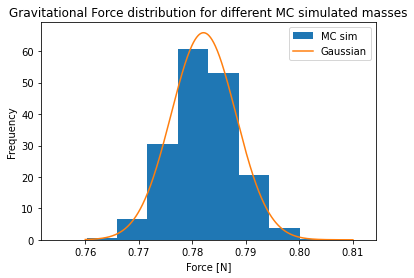

Force - MC (data 1) = 0.7821 +- 0.0061 N


In [9]:
#generate normal distributed random values for delta data 1
M1_mc_1 = np.random.normal(M1, deltaM1_1, mcsamplesize) #mass 1 MC
M2_mc_1 = np.random.normal(M2, deltaM2_1, mcsamplesize) #mass 2 MC
r_mc_1 = np.random.normal(r, deltar_1, mcsamplesize) #r MC

F1 = G*(M1_mc_1*M2_mc_1)/(r_mc_1**2) #calculate force for MC values

xspace = np.arange(0.76, 0.81, 0.0001) #set range for gaussian

#plotting
plt.hist(F1, density = True, label = 'MC sim') #histogram; density = True for normalisation
plt.plot(xspace, gaussian(xspace, F_calc, deltaF_calc_1), label = 'Gaussian') #plot gaussian curve
plt.xlabel('Force [N]') #set x axis title
plt.ylabel('Frequency') #set y axis title
plt.title('Gravitational Force distribution for different MC simulated masses') #set title
plt.legend(loc = 'upper right') #set legend pos
plt.show() #print the plot

print("Force - MC (data 1) =", round(np.mean(F1), 4), "+-", round(np.std(F1), 4), "N") #force from MC

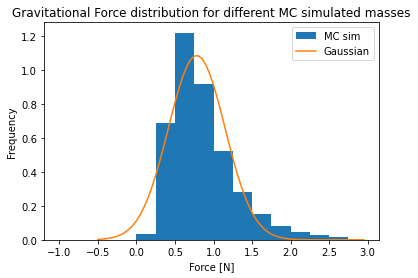

Force - MC (data 2) = 0.8846 +- 0.5302 N


In [10]:
#generate normal distributed random values for delta data 3
M1_mc_2 = np.random.normal(M1, deltaM1_2, mcsamplesize) #mass 1 MC
M2_mc_2 = np.random.normal(M2, deltaM2_2, mcsamplesize) #mass 2 MC
r_mc_2 = np.random.normal(r, deltar_2, mcsamplesize) #r MC

F2 = G*(M1_mc_2*M2_mc_2)/(r_mc_2**2) #calculate force for MC values

binno = np.arange(-1, 3, 0.25) #set bin range for histogram
xspace = np.arange(-0.5, 3, 0.05) #set range for gaussian distribution

#plotting
plt.hist(F2, bins = binno, density = True, label = 'MC sim') #hsitogram with modified bins; density = True for normalisation
plt.plot(xspace, gaussian(xspace, F_calc, deltaF_calc_2), label = 'Gaussian') #plot gaussian curve
plt.xlabel('Force [N]') #set x axis title
plt.ylabel('Frequency') #set y axis title
plt.title('Gravitational Force distribution for different MC simulated masses') #set plot title
plt.legend(loc = 'upper right') #set legend pos
plt.show() #print the plot

print("Force - MC (data 2) =", round(np.mean(F2), 4), "+-", round(np.std(F2), 4), "N") #force from MC

**Remarks:**  
We can see that the Monte Carlo simulation is in excellent agreement for the first set of data, whereas fails for the second set of data. This is because that the second set of data has a large standard deviation, relative to the absolute values. And the histogram for fails to resemble normal distribution for the left tail, since the calculation here cannot be negative (or more correctly, has a almost zero chance of being negative) by our choice of values. This results in the second result being bad, although, the values are still within one standard deviations from each other. This suggests that smaller the errors relative to the absolute value, better the simulation. But, this could also be a fringe case where our choice of values results in a skewed histogram. We might be able to find a set of values with a similar relative standard deviation, yet resulting in a more successful Monte Carlo simulation. But this hypothesis needs to be tested. Monte Carlo method is conceptually simple and very easy to implement. It can be used to quickly validate error propagation and even used as a standalone method for calculating error propagation for more complicated problems.